In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import calinski_harabaz_score, silhouette_score
from scipy.spatial.distance import euclidean, cityblock, cosine

from collections import Counter, OrderedDict
from math import pi

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

In [2]:
nba_data = pd.read_csv('../data/finalmasterdata.csv')

In [10]:
nba_data

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,Age,Tm,Lg,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
0,0,Álex Abrines,111,2018-19,103.0,12.2,-0.2,0.6,6.3,1.0,25.0,OKC,NBA,31.0,2.0,588.0,4.4,12.5,1.2,2.4,3.3,10.1,1.0,1.0,0.4,3.4,3.8,1.6,1.3,0.5,1.1,4.2,13.1,0.357,0.500,0.323,0.487,0.923,0.507,2018,SG
1,1,Jaylen Adams,115,2018-19,99.0,13.5,-0.3,0.1,7.6,3.0,22.0,ATL,NBA,34.0,1.0,428.0,4.1,11.9,1.4,3.9,2.7,8.0,0.8,1.0,1.2,5.3,6.5,7.0,1.5,0.5,3.0,4.9,11.7,0.345,0.361,0.338,0.459,0.778,0.474,2018,PG
2,2,Steven Adams,106,2018-19,120.0,16.4,3.2,9.1,18.5,4.0,25.0,OKC,NBA,80.0,80.0,2669.0,8.4,14.1,8.4,14.1,0.0,0.0,2.6,5.1,6.8,6.5,13.3,2.2,2.0,1.3,2.4,3.6,19.4,0.595,0.596,0.000,0.595,0.500,0.591,2018,C
3,3,Bam Adebayo,104,2018-19,120.0,15.8,2.4,6.8,17.9,5.0,21.0,MIA,NBA,82.0,28.0,1913.0,7.2,12.4,7.1,12.0,0.1,0.4,4.2,5.8,4.2,11.0,15.2,4.7,1.8,1.7,3.1,5.2,18.6,0.576,0.588,0.200,0.579,0.735,0.623,2018,C
4,4,LaMarcus Aldridge,110,2018-19,117.0,26.9,2.5,9.3,22.9,8.0,33.0,SAS,NBA,81.0,81.0,2687.0,12.4,24.0,12.3,23.2,0.2,0.8,6.3,7.5,4.6,9.0,13.5,3.5,0.8,1.9,2.6,3.3,31.4,0.519,0.528,0.238,0.522,0.847,0.576,2018,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8464,Kevin Willis,103,2000-01,100.0,20.5,-0.6,3.1,14.6,8869.0,38.0,TOT,NBA,78.0,22.0,1830.0,8.7,19.7,8.6,19.5,0.0,0.2,3.2,4.2,5.1,10.1,15.2,1.4,1.6,1.5,2.5,6.2,20.6,0.441,0.443,0.167,0.441,0.769,0.478,2000,C
8465,8465,Kevin Willis,103,2000-01,100.0,20.5,-0.6,3.1,14.6,8869.0,38.0,TOT,NBA,78.0,22.0,1830.0,8.7,19.7,8.6,19.5,0.0,0.2,3.2,4.2,5.1,10.1,15.2,1.4,1.6,1.5,2.5,6.2,20.6,0.441,0.443,0.167,0.441,0.769,0.478,2000,C
8466,8466,Kevin Willis,103,2000-01,100.0,20.5,-0.6,3.1,14.6,8869.0,38.0,TOT,NBA,78.0,22.0,1830.0,8.7,19.7,8.6,19.5,0.0,0.2,3.2,4.2,5.1,10.1,15.2,1.4,1.6,1.5,2.5,6.2,20.6,0.441,0.443,0.167,0.441,0.769,0.478,2000,C
8467,8467,Metta World Peace,104,2000-01,94.0,21.6,0.7,1.9,13.6,8872.0,21.0,CHI,NBA,76.0,74.0,2363.0,7.4,18.5,6.5,15.2,1.0,3.4,4.8,6.4,1.3,5.3,6.7,5.2,3.5,1.0,3.6,5.8,20.6,0.401,0.426,0.291,0.428,0.750,0.483,2000,SF


In [26]:
years = nba_data['Year'].unique()

AttributeError: 'str' object has no attribute 'unique'

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])

In [33]:
years = []

for i in range(2000,2019):
    years.append(str(i))
years

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [ ]:
for i in years:
    nba_data['Year'] == i 

In [32]:
years

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [42]:
season_2000 = nba_data[nba_data['Year']==2000]
season_2001 = nba_data[nba_data['Year']==2001]
season_2002 = nba_data[nba_data['Year']==2002]
season_2003 = nba_data[nba_data['Year']==2003]
season_2004 = nba_data[nba_data['Year']==2004]
season_2005 = nba_data[nba_data['Year']==2005]
season_2006 = nba_data[nba_data['Year']==2006]
season_2007 = nba_data[nba_data['Year']==2007]
season_2008 = nba_data[nba_data['Year']==2008]
season_2009 = nba_data[nba_data['Year']==2009]
season_2010 = nba_data[nba_data['Year']==2010]
season_2011 = nba_data[nba_data['Year']==2011]
season_2012 = nba_data[nba_data['Year']==2012]
season_2013 = nba_data[nba_data['Year']==2013]
season_2014 = nba_data[nba_data['Year']==2014]
season_2015 = nba_data[nba_data['Year']==2015]
season_2016 = nba_data[nba_data['Year']==2016]
season_2017 = nba_data[nba_data['Year']==2017]
season_2018 = nba_data[nba_data['Year']==2018]


In [45]:
seasons = [season_2000,season_2001,season_2002,season_2003, season_2004,season_2005,season_2006,season_2007,season_2008,season_2009,season_2010,season_2011,season_2012,season_2013,season_2014,season_2015,season_2016,season_2017,season_2018]

In [56]:
lst

NameError: name 'lst' is not defined

In [40]:
lst = []
for i in years: 
    i = nba_data[nba_data['Year']==i]
    

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [35]:
nba_data[years[0]]

KeyError: '2000'

In [59]:

year_list = []
for i in range(2000,2019):
    year_list.append(i)

In [62]:
year_list.reverse()

In [63]:
year_list

[2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000]

In [46]:
ThreeP = []
ThreePA = []
TwoP = []
TwoPA = []
FT = []
FTA = []

for i in seasons:
    ThreeP.append(np.nanmean(i['3P'].astype(float)))
    ThreePA.append(np.nanmean(i['3PA'].astype(float)))
    TwoP.append(np.nanmean(i['2P'].astype(float)))
    TwoPA.append(np.nanmean(i['2PA'].astype(float)))
    FT.append(np.nanmean(i['FT'].astype(float)))
    FTA.append(np.nanmean(i['FTA'].astype(float)))

In [67]:
seasons

[      Unnamed: 0               Player  DRtg   Season   ORtg  USG%  VORP   WS  \
 8061        8061   Mahmoud Abdul-Rauf   111  2000-01  104.0  26.8  -0.3  0.7   
 8062        8062    Tariq Abdul-Wahad   106  2000-01   79.0  17.1  -0.4 -0.4   
 8063        8063  Shareef Abdur-Rahim   104  2000-01  106.0  24.6   3.5  8.5   
 8064        8064   Courtney Alexander   109  2000-01   96.0  23.2  -0.8  0.8   
 8065        8065   Courtney Alexander   109  2000-01   96.0  23.2  -0.8  0.8   
 ...          ...                  ...   ...      ...    ...   ...   ...  ...   
 8464        8464         Kevin Willis   103  2000-01  100.0  20.5  -0.6  3.1   
 8465        8465         Kevin Willis   103  2000-01  100.0  20.5  -0.6  3.1   
 8466        8466         Kevin Willis   103  2000-01  100.0  20.5  -0.6  3.1   
 8467        8467    Metta World Peace   104  2000-01   94.0  21.6   0.7  1.9   
 8468        8468      Lorenzen Wright   103  2000-01   99.0  23.2   0.1  3.2   
 
        PER      Rk   Age 

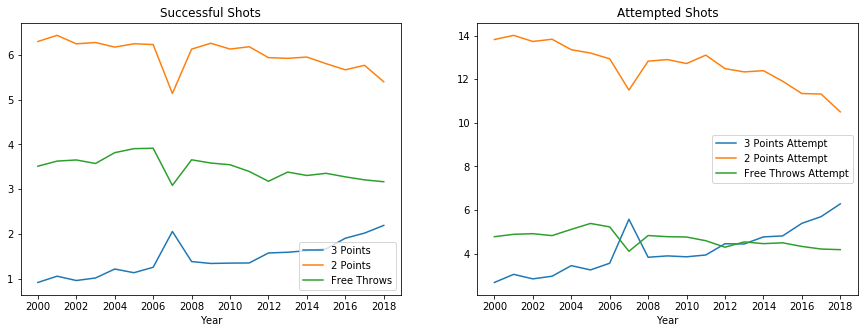

In [64]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax.plot(year_list[::-1], ThreeP, label='3 Points')
ax.plot(year_list[::-1], TwoP, label='2 Points')
ax.plot(year_list[::-1], FT, label='Free Throws')
ax.set_title('Successful Shots')
ax.set_xticks(np.arange(2000, 2020, 2))
ax.set_xlabel('Year')
ax.legend()

ax2.plot(year_list[::-1], ThreePA, label='3 Points Attempt')
ax2.plot(year_list[::-1], TwoPA, label='2 Points Attempt')
ax2.plot(year_list[::-1], FTA, label='Free Throws Attempt')
ax2.set_title('Attempted Shots')
ax2.set_xlabel('Year')
ax2.set_xticks(np.arange(2000, 2020, 2))
ax2.legend()
plt.show()

In [80]:
season_2008.head(50)

,Unnamed: 0,Player,DRtg,Season,ORtg,USG%,VORP,WS,PER,Rk,Age,Tm,Lg,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Year,Pos
4538,4538,Arron Afflalo,110,2008-09,107.0,14.5,-0.1,1.8,8.9,4850.0,23.0,DET,NBA,74.0,8.0,1234.0,5.9,13.5,3.9,8.7,1.9,4.8,2.6,3.2,1.3,4.7,6.0,2.0,1.3,0.6,1.9,6.5,16.3,0.437,0.456,0.402,0.508,0.817,0.548,2008,SG
4539,4539,LaMarcus Aldridge,108,2008-09,115.0,23.7,3.0,9.5,19.1,4854.0,23.0,POR,NBA,81.0,81.0,3004.0,11.1,22.9,11.0,22.4,0.1,0.5,4.8,6.2,4.3,6.8,11.2,2.9,1.4,1.4,2.2,3.8,27.1,0.484,0.489,0.250,0.486,0.781,0.529,2008,PF
4540,4540,Joe Alexander,108,2008-09,96.0,20.9,-0.2,0.4,10.1,4855.0,22.0,MIL,NBA,59.0,0.0,716.0,7.4,17.7,6.2,14.4,1.2,3.3,4.2,6.0,3.2,5.1,8.3,3.0,1.1,2.1,3.8,7.7,20.1,0.416,0.432,0.348,0.449,0.699,0.494,2008,SF
4541,4541,Malik Allen,110,2008-09,96.0,15.4,-0.4,0.3,7.3,4856.0,30.0,MIL,NBA,49.0,3.0,579.0,6.5,15.2,6.5,15.1,0.0,0.1,0.9,1.9,3.1,6.1,9.2,3.1,0.6,1.1,1.8,8.0,14.0,0.429,0.432,0.000,0.429,0.476,0.435,2008,PF
4542,4542,Ray Allen,106,2008-09,122.0,20.8,4.3,11.1,17.3,4857.0,33.0,BOS,NBA,79.0,79.0,2876.0,9.2,19.2,5.5,10.2,3.7,9.0,4.4,4.6,1.2,3.9,5.1,4.0,1.3,0.2,2.5,2.9,26.5,0.480,0.542,0.409,0.575,0.952,0.624,2008,SG
4543,4543,Tony Allen,100,2008-09,98.0,21.5,0.4,1.6,12.9,4858.0,27.0,BOS,NBA,46.0,2.0,887.0,8.2,17.0,7.8,15.4,0.4,1.6,4.7,6.5,1.3,4.9,6.2,4.0,3.2,1.4,4.6,5.9,21.5,0.482,0.510,0.222,0.493,0.725,0.541,2008,SG
4544,4544,Rafer Alston,104,2008-09,105.0,19.9,1.9,5.3,13.8,4860.0,32.0,TOT,NBA,77.0,76.0,2447.0,6.8,17.7,4.4,10.5,2.4,7.1,3.4,4.5,0.7,4.2,4.9,8.8,2.3,0.2,3.0,2.9,19.4,0.385,0.417,0.338,0.454,0.750,0.494,2008,PG
4545,4545,Rafer Alston,104,2008-09,105.0,19.9,1.9,5.3,13.8,4860.0,32.0,TOT,NBA,77.0,76.0,2447.0,6.8,17.7,4.4,10.5,2.4,7.1,3.4,4.5,0.7,4.2,4.9,8.8,2.3,0.2,3.0,2.9,19.4,0.385,0.417,0.338,0.454,0.750,0.494,2008,PG
4546,4546,Rafer Alston,104,2008-09,105.0,19.9,1.9,5.3,13.8,4860.0,32.0,TOT,NBA,77.0,76.0,2447.0,6.8,17.7,4.4,10.5,2.4,7.1,3.4,4.5,0.7,4.2,4.9,8.8,2.3,0.2,3.0,2.9,19.4,0.385,0.417,0.338,0.454,0.750,0.494,2008,PG
4547,4547,Lou Amundson,109,2008-09,108.0,15.1,0.4,1.8,13.3,4861.0,26.0,PHO,NBA,76.0,0.0,1044.0,6.4,12.0,6.4,11.9,0.0,0.0,2.5,5.7,6.1,6.8,12.9,1.3,1.5,3.1,2.7,7.4,15.4,0.536,0.538,0.000,0.536,0.442,0.530,2008,PF
